# Final Project : Facial Feature Localization

### CSC 215-01 Artificial Intelligence (Fall 2019)

### Team member : 
    1) Ayushi Vadwala
    2) Jeet Shah

### Problem Formulation :   
    The aim of the project is to find the facial features on the gray scale images given as input. The output of the model will be the predicted value of the facial coordinates in (x, y) format which will help in placing the facial filter on the image.
            
### Model used to predict Facial Feature Locations : 
- Cascaded Convolutional Neural Network

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_train = pd.read_csv('data/training.csv')

In [3]:
df_test = pd.read_csv('data/test.csv')

In [56]:
def string2image(string):
    """Converts a string to a numpy array."""
    return np.array([int(item) for item in string.split()]).reshape((96, 96))

def plot_faces(nrows=6, ncols=6):
    """Randomly displays some faces from the training data."""
    selection = np.random.choice(df_train.index, size=(nrows*ncols), replace=False)
    image_strings = df_train.loc[selection]['Image']
    fig, axes = plt.subplots(figsize=(10, 10), nrows=nrows, ncols=ncols)
    for string, ax in zip(image_strings, axes.ravel()):
        ax.imshow(string2image(string), cmap='gray')
        ax.axis('off')
        
def plot_faces_with_keypoints(nrows=6, ncols=6):
    """Randomly displays some faces from the training data with their keypoints."""
    selection = np.random.choice(df_train.index, size=(nrows*ncols), replace=False)
    image_strings = df_train.loc[selection]['Image']
    keypoint_cols = list(df_train.columns)[:-1]
    keypoints = df_train.loc[selection][keypoint_cols]
    fig, axes = plt.subplots(figsize=(10, 10), nrows=nrows, ncols=ncols)
    for string, (iloc, keypoint), ax in zip(image_strings, keypoints.iterrows(), axes.ravel()):
        xy = keypoint.values.reshape((15, 2))
        ax.imshow(string2image(string), cmap='gray')
        ax.plot(xy[:, 0], xy[:, 1], 'b*')
        ax.axis('off')
        
IMAGE_HEIGHT=96
IMAGE_WIDTH=96
def img_show(image_list,train):
    fig,axes = plt.subplots(nrows=5,ncols=2,dpi=300,figsize=(10,10))

    for row in range(5):
        for col in range(1):
            #random number  generator for diff image
            j  =np.random.randint(0,len(train))
            X = image_list.reshape(-1,96,96)[j]
            Y = train

            Y=Y.iloc[j]# location of Y
            img = np.copy(X) #copy image
            for i in range(0,30,2):
                   if 0 < Y[Y.index[i]] < IMAGE_WIDTH and  0 < Y[Y.index[i+1]] < IMAGE_HEIGHT:
                    img[int(Y[Y.index[i+1]]),int(Y[Y.index[i]])] = 255
            axes[row,col].imshow(img,cmap='gray')
            axes[row,col+1].imshow(X,cmap='gray')
            #remove axies
            axes[row,col].axis('off')
            axes[row,col+1].axis('off')

    plt.tight_layout()
    
def plot_m(ax, center_xy, dx):
    """Plots a moustache scaled by its width, dx, on current ax."""
    moustache_scaled = moustache_contour.copy()
    moustache_scaled -= moustache_contour.min(axis=0)
    moustache_scaled /= moustache_scaled.max(axis=0)[1]
    deltas = moustache_scaled.max(axis=0) - moustache_scaled.min(axis=0)
    moustache_scaled -= np.array([deltas[0]/2, deltas[1]/2])
    moustache_scaled *= dx
    moustache_scaled += center_xy[::-1]
    ax.fill(moustache_scaled[:, 1], moustache_scaled[:, 0], "k", linewidth=4)

def plot_s(ax, center_xy, dx):
    """Plots a moustache scaled by its width, dx, on current ax."""
    star_scaled = star_contour.copy()
    star_scaled -= star_contour.min(axis=0)
    star_scaled /= star_scaled.max(axis=0)[1]
    deltas = star_scaled.max(axis=0) - star_scaled.min(axis=0)
    star_scaled -= np.array([deltas[0]/2, deltas[1]/2])
    star_scaled *= dx
    star_scaled += center_xy[::-1]
    ax.fill(star_scaled[:, 1], star_scaled[:, 0], "r", linewidth=4)
    
def moustache(predicted_points, ax):
    """Draws a moustache using the predicted face points."""
    dx = 2 * np.linalg.norm(predicted_points[12, :] - predicted_points[11, :])
    center_xy = predicted_points[13, :]
    plot_m(ax, center_xy, dx)
    
def star(predicted_points, ax):
    """Draws a moustache using the predicted face points."""
    dx = 2 * np.linalg.norm(predicted_points[9, :] - predicted_points[8, :])
    center_xy = predicted_points[1, :]
    plot_s(ax, center_xy, dx)
    
def plot_faces_with_filter(model, nrows=5, ncols=5, model_input='flat'):
    """Plots sampled faces with their truth and predictions."""
    selection = np.random.choice(np.arange(X_test.shape[0]), size=(nrows*ncols), replace=False)
    fig, axes = plt.subplots(figsize=(10, 10), nrows=nrows, ncols=ncols)
    for ind, ax in zip(selection, axes.ravel()):
        img = X_test[ind, :, :, 0]
        if model_input == 'flat':
            predictions = model.predict(img.reshape(1, -1))
        else:
            predictions = model.predict(img[np.newaxis, :, :, np.newaxis])
        xy_predictions = output_pipe.inverse_transform(predictions).reshape(15, 2)
        ax.imshow(img, cmap='gray')
        moustache(xy_predictions, ax)
        star(xy_predictions, ax)
        ax.axis('off')

In [5]:
df_train.T[:5]

,0,1,2,3,4,5,6,7,8,9,...,7039,7040,7041,7042,7043,7044,7045,7046,7047,7048
left_eye_center_x,66.0336,64.3329,65.0571,65.2257,66.7253,69.6807,64.1319,67.4689,65.8029,64.1212,...,69.2299,63.353,65.7112,67.9293,66.8672,67.4025,66.1344,66.6907,70.9651,66.9383
left_eye_center_y,39.0023,34.9701,34.9096,37.2618,39.6213,39.9687,34.29,39.4135,34.7552,36.7403,...,38.5756,35.6713,38.8435,35.8466,37.3569,31.8426,38.3655,36.8452,39.8537,43.4245
right_eye_center_x,30.227,29.9493,30.9038,32.0231,32.2448,29.1836,29.579,29.356,27.4758,29.4689,...,29.4079,33.9521,32.2688,28.6878,30.7509,29.7467,30.4786,31.6664,30.5433,31.0961
right_eye_center_y,36.4217,33.4487,34.9096,37.2618,38.042,37.5634,33.138,39.6217,36.1856,38.3902,...,38.3455,40.8164,37.706,41.4525,40.1157,38.6329,39.9502,39.685,40.7723,39.5286
left_eye_inner_corner_x,59.5821,58.8562,59.412,60.0033,58.5659,62.8643,57.7972,59.555,58.6522,58.6209,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_test[:5]

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...


#### In training dataset images are given as pixels. So, we have converted that pixels into images using defination plot_faces().

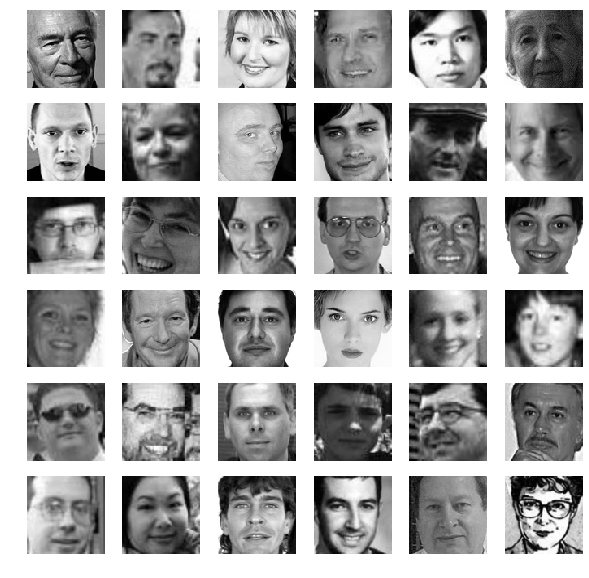

In [13]:
plot_faces()

#### Storing keypoints given in training dataset into a list.

In [8]:
keypoint_cols = list(df_train.columns)[:-1]

In [9]:
locations = df_train.iloc[0][keypoint_cols].values.reshape((15, 2))
locations

array([[66.0335639098, 39.0022736842],
       [30.2270075188, 36.4216781955],
       [59.582075188000005, 39.647422556399995],
       [73.1303458647, 39.9699969925],
       [36.3565714286, 37.3894015038],
       [23.4528721805, 37.3894015038],
       [56.9532631579, 29.0336481203],
       [80.2271278195, 32.2281383459],
       [40.2276090226, 29.0023218045],
       [16.3563789474, 29.6474706767],
       [44.4205714286, 57.0668030075],
       [61.1953082707, 79.9701654135],
       [28.6144962406, 77.38899248119999],
       [43.3126015038, 72.9354586466],
       [43.1307067669, 84.4857744361]], dtype=object)

#### Plotting face images with their related keypoints.

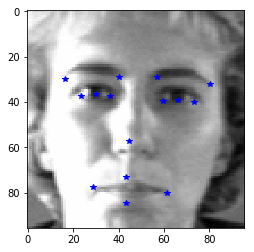

In [10]:
plt.plot(locations[:, 0], locations[:, 1], 'b*')
plt.imshow(string2image(df_train.iloc[78]['Image']), cmap='gray')

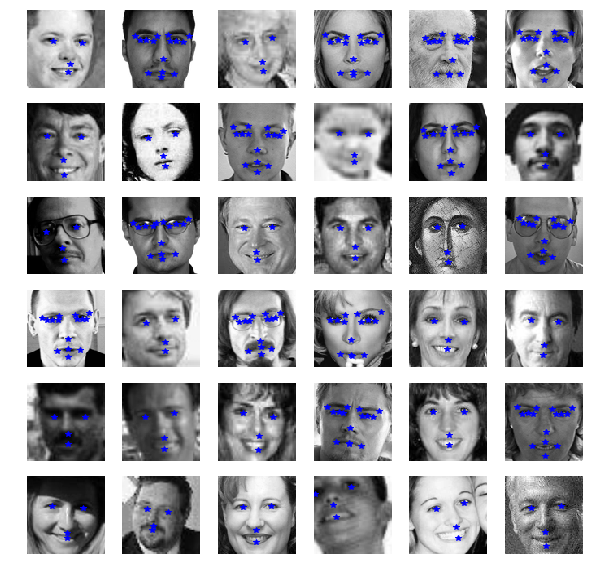

In [14]:
plot_faces_with_keypoints()

In [115]:
df_train.shape

(7049, 31)

In [116]:
df_test.shape

(1783, 2)

#### Detecting OUTLIERS in Dataset
- The statistics about the key point from below BAR graph suggests that this dataset, only 2140 images are "high quality" with all keypoints, while 4909 other images are "low quality" with only 4 keypoints labelled which are the outliers.

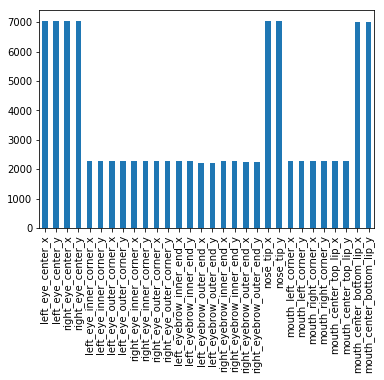

In [15]:
df_train.describe().loc['count'].plot.bar()

In [17]:
df_train = df_train.dropna()
df_train.shape

(2140, 31)

#### After removing outliers every images have all 30 keypoints.

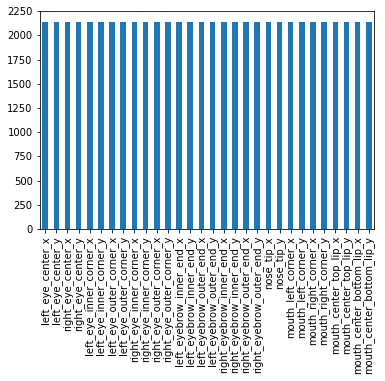

In [18]:
df_train.describe().loc['count'].plot.bar()

#### Since CNN works with the 4-d array, We have to reshape all images into 4-d array.

In [19]:
image_list=[]

for i in df_train['Image']:
    i=i.split(' ')
    image_list.append(i)
len(image_list)

2140

In [20]:
#convert to array
image_list = np.array(object=image_list,dtype=float)

In [21]:
images = image_list.reshape(-1,96,96,1)

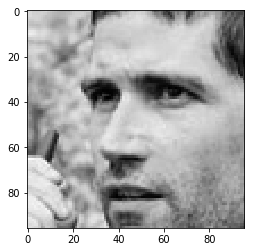

In [22]:
plt.imshow(image_list.reshape(-1,96,96)[2010],cmap='gray')

In [23]:
y = df_train.drop(labels='Image',axis=1)
y.shape

(2140, 30)

In [24]:
x = images
x.shape

(2140, 96, 96, 1)

In [25]:
x= np.asarray(x)
y= np.asarray(y)

#### Spliting training dataset into train and test using sklearn's train_test_split method.

In [26]:
from sklearn.model_selection import train_test_split

global random_seed
random_seed = 9
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=random_seed)

In [27]:
X_train.shape

(1712, 96, 96, 1)

In [28]:
y_train.shape

(1712, 30)

In [29]:
X_test.shape

(428, 96, 96, 1)

In [30]:
y_test.shape

(428, 30)

#### The cascaded convolutional neural network has a Main network and four classification branches. Since Cascaded CNN using more CONV2D and MaxPooling layers with compared to CNN, We resized images into 224 x 224 pixels.

In [31]:
import skimage.transform

new_x_train_224x224 = []

for image in X_train:
    newImage = skimage.transform.resize(image, (224, 224)) # resize also normalizes your image
    new_x_train_224x224.append(newImage)


c:\anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
c:\anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [32]:
import skimage.transform

new_x_test_224x224 = []

for image in X_test:
    newImage = skimage.transform.resize(image, (224, 224)) # resize also normalizes your image
    new_x_test_224x224.append(newImage)


In [33]:
new_x_train_224x224 = np.asarray(new_x_train_224x224)
print("Shape of new_x_train_224x224: {}".format(new_x_train_224x224.shape))

Shape of new_x_train_224x224: (1712, 224, 224, 1)


In [34]:
new_x_test_224x224 = np.asarray(new_x_test_224x224)
print("Shape of new_x_test_224x224: {}".format(new_x_test_224x224.shape))

Shape of new_x_test_224x224: (428, 224, 224, 1)


#### Training of a Cascaded CNN model

In [35]:
# Shared Input Layer
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import concatenate
import os

# input layer
visible = Input(shape=(224,224,1))

# Main Network
conv1 = Conv2D(64, kernel_size=4, activation='relu')(visible)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
#conv2 = Conv2D(16, kernel_size=(3,3), activation='relu')(pool1)
#pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
#flat5 = Flatten(pool2)

# first feature extractor
pool5 = MaxPooling2D(pool_size=(2, 2))(pool1)
drop1 = Dropout(0.25)(pool5)
conv9 = Conv2D(32, kernel_size=2, activation='relu')(drop1)
dense1 = Dense(20, activation="softmax")(conv9)
flat1 = Flatten()(dense1)

conv3 = Conv2D(64, kernel_size=4, activation='relu')(pool1)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
#conv4 = Conv2D(8, kernel_size=(3,3), activation='relu')(pool3)
#pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)
#flat6 = Flatten(pool4)

# second feature extractor
pool6 = MaxPooling2D(pool_size=(2, 2))(pool3)
drop2 = Dropout(0.25)(pool6)
conv10 = Conv2D(32, kernel_size=2, activation='relu')(drop2)
dense2 = Dense(10, activation="softmax")(conv10)
flat2 = Flatten()(dense2)

conv5 = Conv2D(32, kernel_size=2, activation='relu')(pool3)
pool5 = MaxPooling2D(pool_size=(2, 2))(conv5)
#conv6 = Conv2D(8, kernel_size=(3,3), activation='relu')(pool5)
#pool6 = MaxPooling2D(pool_size=(2, 2))(conv6)
#flat7 = Flatten(pool6)

# third feature extractor
drop3 = Dropout(0.25)(pool5)
conv11 = Conv2D(16, kernel_size=2, activation='relu')(drop3)
dense3 = Dense(10, activation="softmax")(conv11)
flat3 = Flatten()(dense3)

conv7 = Conv2D(16, kernel_size=4, activation='relu')(pool5)
#conv8 = Conv2D(8, kernel_size=(3,3), activation='relu')(conv7)
#pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)
#flat8 = Flatten()(conv8)

# fourth feature extractor
drop4 = Dropout(0.25)(conv7)
conv12 = Conv2D(8, kernel_size=4, activation='relu')(drop4)
dense4 = Dense(10, activation="softmax")(conv12)
flat4 = Flatten()(dense4)


# merge feature extractors
merge = concatenate([flat1, flat2, flat3, flat4])

# interpretation layer
#hidden1 = Dense(30, activation='relu')(merge)

# prediction output
output = Dense(30, activation='relu')(merge)

model = Model(inputs=visible, outputs=output)

# summarize layers
print(model.summary())
# plot graph
#plot_model(model)

c:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is 

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 1)  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 221, 221, 64) 1088        input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 110, 110, 64) 0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 107, 107, 64) 65600       max_pooling2d[0][0]              
__________________________________________________________________________________________________
max_poolin

In [36]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['acc'])

In [37]:
from tensorflow.keras.callbacks import EarlyStopping
#monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=5, verbose=1, mode='auto')
#hist=model.fit(x=X_train,y=y_train,batch_size=128,epochs=10,verbose=2,validation_split=0.2)
#hist

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=3, verbose=1, mode='auto')

hist = model.fit(new_x_train_224x224, y_train, batch_size=128, epochs=100, validation_data=(new_x_test_224x224, y_test),verbose=2)
hist

Train on 1712 samples, validate on 428 samples
Epoch 1/100
 - 14s - loss: 1124.8462 - acc: 0.0035 - val_loss: 142.5658 - val_acc: 0.0000e+00
Epoch 2/100
 - 6s - loss: 83.6082 - acc: 0.4667 - val_loss: 82.5656 - val_acc: 0.7196
Epoch 3/100
 - 5s - loss: 49.0365 - acc: 0.7015 - val_loss: 17.9000 - val_acc: 0.7196
Epoch 4/100
 - 6s - loss: 15.8976 - acc: 0.7015 - val_loss: 13.6978 - val_acc: 0.7196
Epoch 5/100
 - 5s - loss: 11.9297 - acc: 0.7015 - val_loss: 10.9076 - val_acc: 0.7196
Epoch 6/100
 - 6s - loss: 10.5788 - acc: 0.7015 - val_loss: 10.2985 - val_acc: 0.7196
Epoch 7/100
 - 6s - loss: 10.1660 - acc: 0.7015 - val_loss: 10.1140 - val_acc: 0.7196
Epoch 8/100
 - 6s - loss: 10.0764 - acc: 0.7015 - val_loss: 10.0886 - val_acc: 0.7196
Epoch 9/100
 - 6s - loss: 10.0256 - acc: 0.7015 - val_loss: 10.0866 - val_acc: 0.7196
Epoch 10/100
 - 5s - loss: 9.8755 - acc: 0.7015 - val_loss: 9.8636 - val_acc: 0.7196
Epoch 11/100
 - 6s - loss: 9.7072 - acc: 0.7015 - val_loss: 9.5579 - val_acc: 0.7196
E

Epoch 97/100
 - 6s - loss: 0.1671 - acc: 0.9410 - val_loss: 3.4810 - val_acc: 0.7360
Epoch 98/100
 - 6s - loss: 0.1539 - acc: 0.9404 - val_loss: 3.4993 - val_acc: 0.7383
Epoch 99/100
 - 6s - loss: 0.1517 - acc: 0.9498 - val_loss: 3.5295 - val_acc: 0.7383
Epoch 100/100
 - 6s - loss: 0.1550 - acc: 0.9533 - val_loss: 3.4717 - val_acc: 0.7360


#### RMSE and R2 Score

In [38]:
from sklearn import metrics

y_pred =model.predict(new_x_test_224x224)

score = np.sqrt(metrics.mean_squared_error(y_test,y_pred)) 

print("Score (RMSE) : {}".format(score))
print("R2 score     :",metrics.r2_score(y_test,y_pred))
#score = r2_score(y_train,y_pred)
#score


Score (RMSE) : 1.8632430850308914
R2 score     : 0.6331486186658388


In [40]:
y_pred = np.asarray(y_pred)
y_test = np.asarray(y_test)

In [41]:
import collections
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shutil
import os

# Regression chart.
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

#### Regression Chart

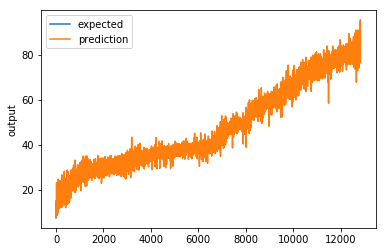

In [42]:
chart_regression(y_pred.flatten(),y_test)

In [43]:
pred_val = model.predict(new_x_test_224x224)

### Plotting Face Images of the splitted test dataset from training with predicted feature locations. 

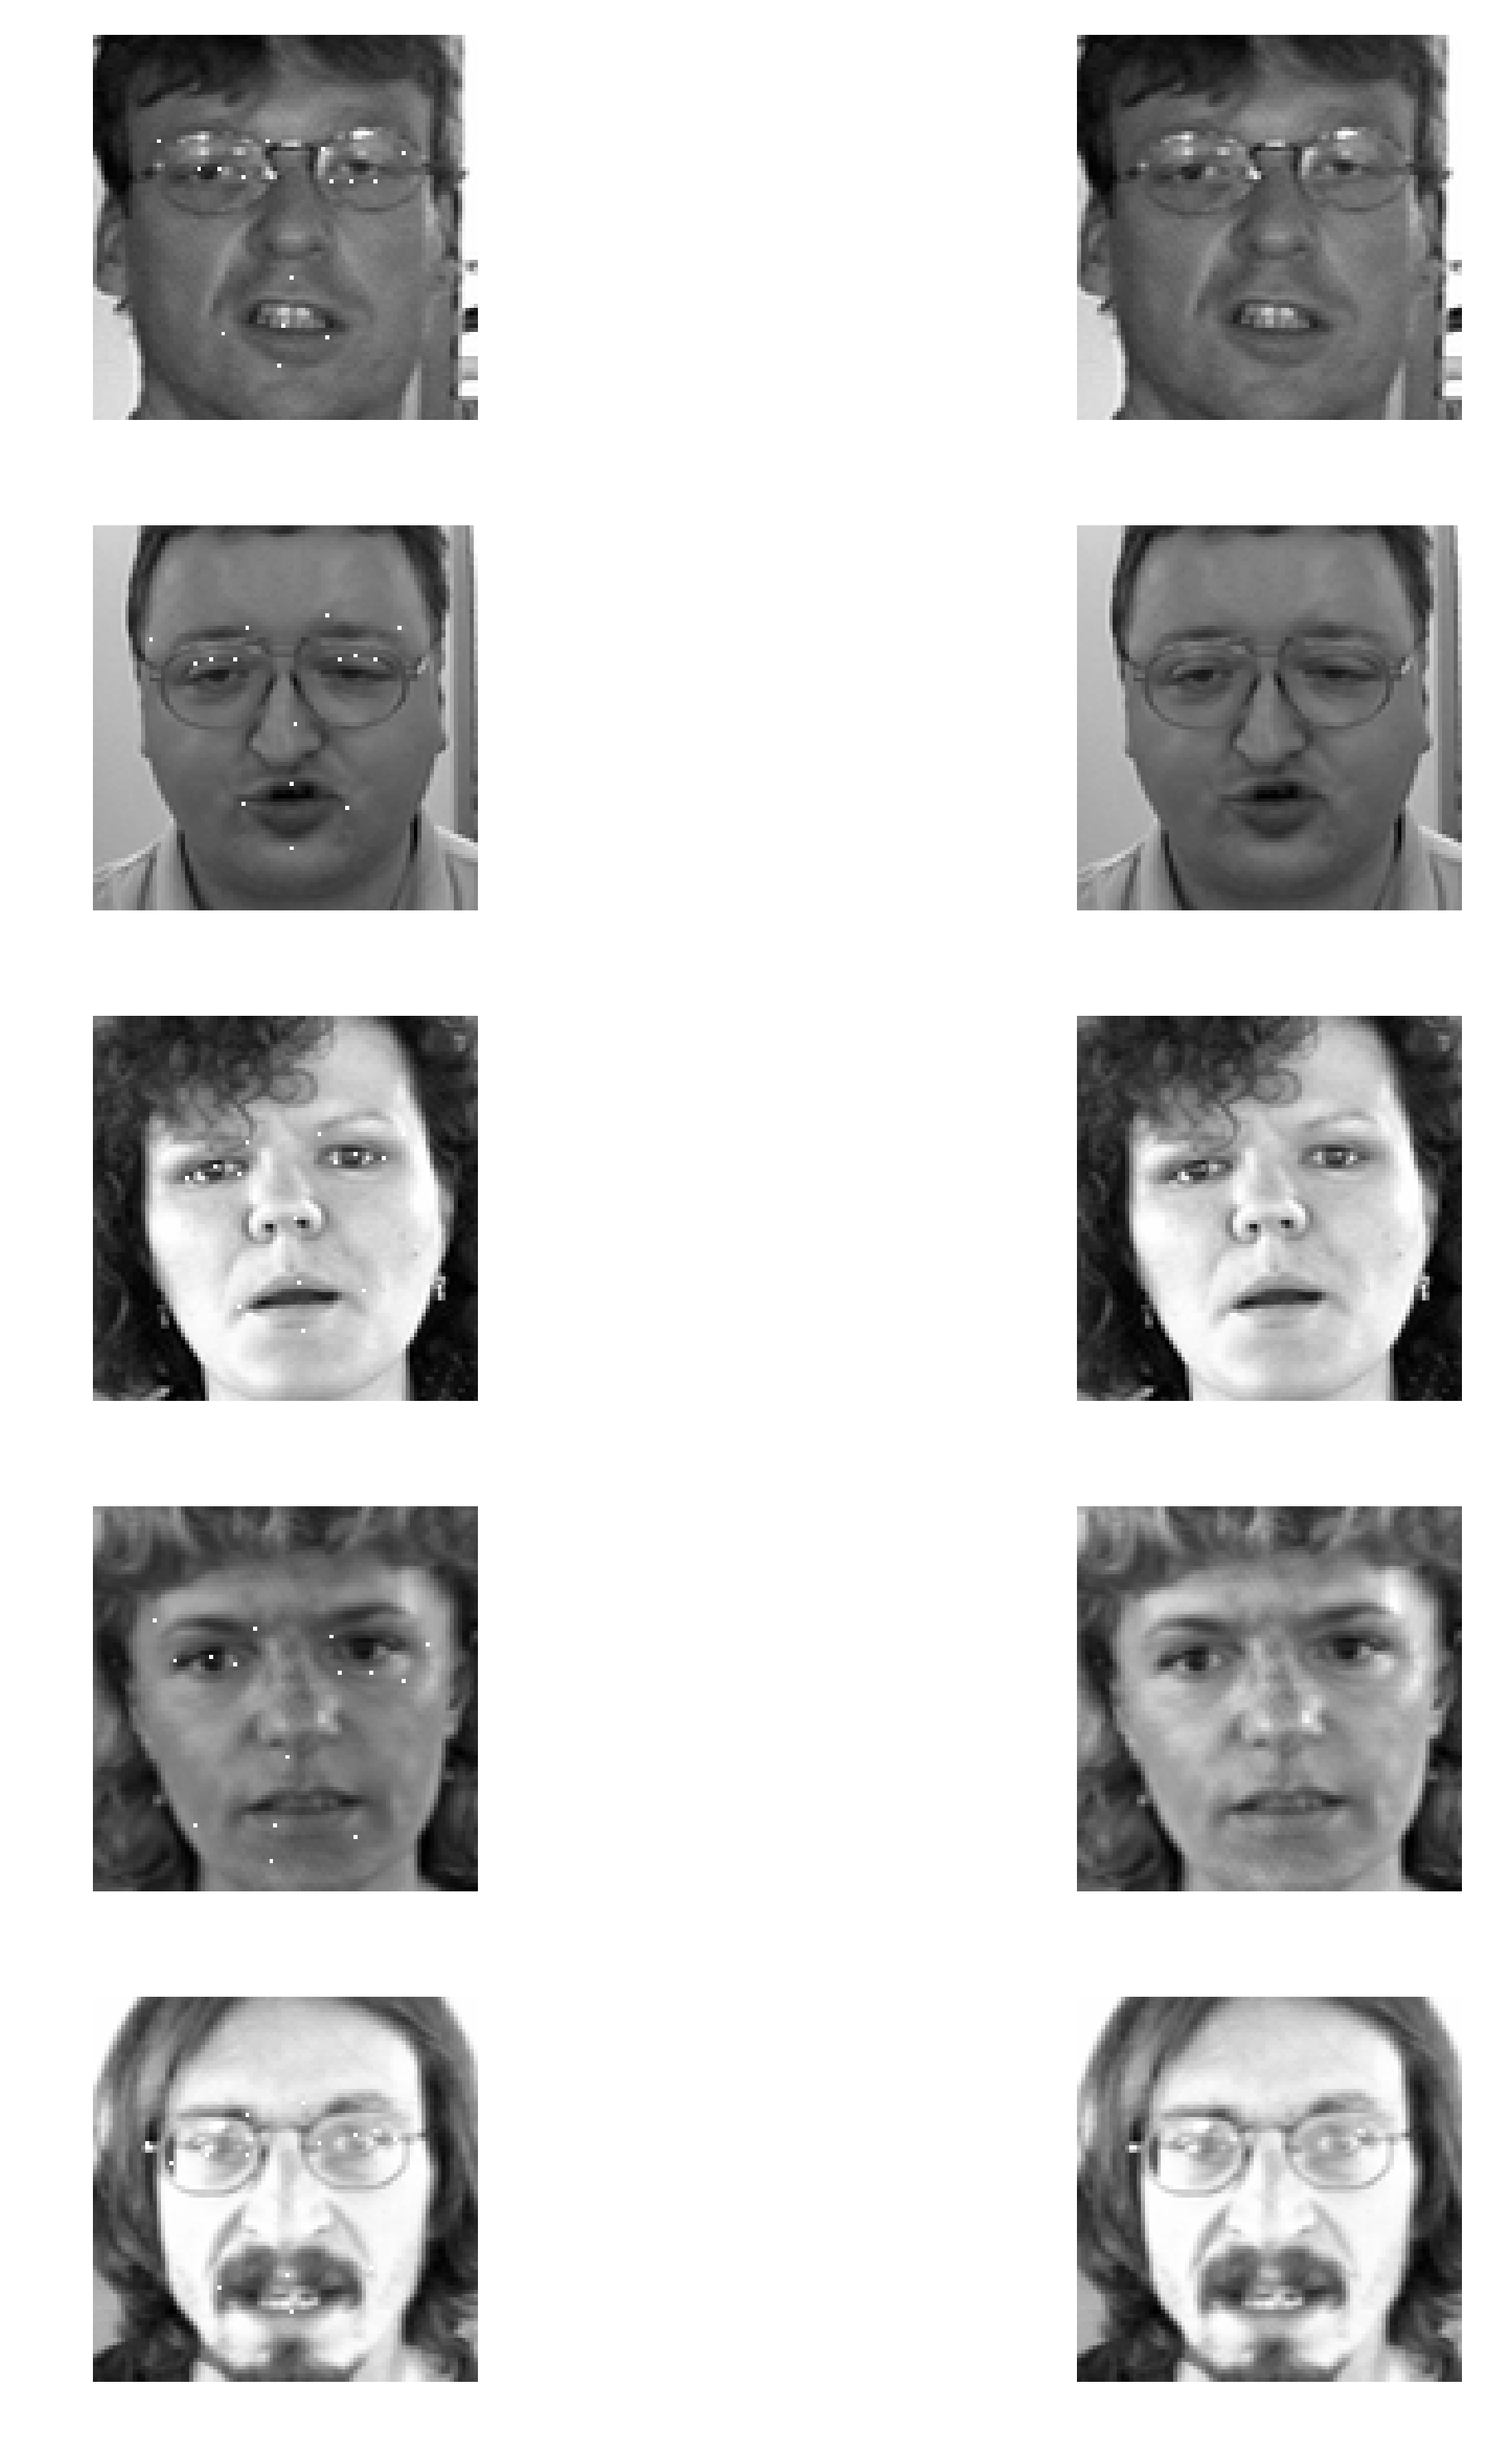

In [57]:
pred_value = pd.DataFrame(data=pred_val)
img_show(image_list,pred_value)

### Since this is a dataset from Kaggle, test does not have target. So, We just calculated the locations of the particular feature with the help of IdLookupTable which is given in Kaggle dataset.

In [84]:
image_list_test=[]

for i in df_test['Image']:
    i=i.split(' ')
    image_list_test.append(i)
len(image_list_test)

1783

In [85]:
image_list_test=np.array(image_list_test,dtype=float)
images_test=image_list_test.reshape(-1,96,96,1)
X1_test =images/255.0

In [86]:
import skimage.transform

X2_test = []

for image in X1_test:
    newImage = skimage.transform.resize(image, (224, 224)) # resize also normalizes your image
    X2_test.append(newImage)


c:\anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
c:\anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [87]:
X2_test = np.asarray(X2_test)
print("Shape of X2_test: {}".format(X2_test.shape))

Shape of X2_test: (2140, 224, 224, 1)


In [90]:
pred = model.predict(X2_test)
lookup = pd.read_csv('data/IdLookupTable.csv')
lookup_list = list(lookup['FeatureName'])
imageId = list(lookup['ImageId']-1)
pred_list = list(pred)
rowId = lookup['RowId']
rowId=list(rowId)
feature = []
for f in list(lookup['FeatureName']):
    feature.append(lookup_list.index(f))
predicted = []
for x,y in zip(imageId,feature):
    predicted.append(pred_list[x][y])
rowId = pd.Series(rowId,name = 'RowId')

location = pd.Series(predicted,name = 'Location')

submission = pd.concat([rowId,location],axis = 1)
submission[:10]

,RowId,Location
0,1,54.733200
1,2,38.311283
2,3,35.186878
3,4,33.851063
4,5,53.343487
5,6,37.080002
6,7,58.380810
7,8,37.313629
8,9,34.930195
9,10,36.623039
